# Evaluacion y Comparacion: Gauge - SBPP 

In [93]:
__region_north = ['E.M. Rivera','Paso Ataques','Tranqueras']
__region_center = ['E.M. Paso de los Toros','Pueblo Centenario'] # , 'UTE Baygorria']
__region_south = ['San Jacinto','San Antonio','25 de Agosto']

## Setup

In [94]:
dir_google_drive_db = "/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/Proyecto Colab/06 - Merge SBPP Gauge/"


dir_google_drive = "/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/Proyecto Colab/07 - Report Validation/"
dir_data = './data/'
dir_data_source = dir_data+'/source/'
dir_data_shapefiles = dir_data+'/source/'
dir_var = './var/'
dir_download = dir_var+'/download/'
dir_output = dir_var+'/output/'
dir_log = dir_var+'/log/'
dir_tmp = dir_var+'/tmp/'

### Libraries

In [95]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
# https://gist.github.com/bradyrx/1a15d8c45eac126e78d84af3f123ffdb
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import xarray as xr
import numpy as np
from shapely.geometry import Point, Polygon

In [97]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 


# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Utils
# import wget
import os 
import shutil
import glob
import calendar
from math import sqrt

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
# import geopandas as gpd
# from shapely.geometry import Point, Polygon


In [98]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
# import geopandas
# import geopandas as gpd
# import contextily as ctx # for basemaps
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

In [99]:
def get_geometry_uruguay():
  df_world_shapes = gpd.read_file(dir_data+"/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp")
  df_uruguay_shapes = df_world_shapes[ df_world_shapes['ISO2'] == 'UY']
  # df_uruguay_shapes
  polygon_uruguay = df_uruguay_shapes['geometry']
  return polygon_uruguay
  # polygon_uruguay = geometry[210]
  # return gpd.GeoSeries(polygon_uruguay)

def xget_geometry_uruguay():
  df_world_shapes = gpd.read_file("/content/c100Polygon.shp")
  return df_world_shapes.iloc[1].geometry


#### Plot

In [100]:
# def _fig2_plot(df, _axs, gauge, ls, title, ymax=False, show_xticks=False):
#   df = df.reset_index()
#   df['time'] = pd.DatetimeIndex(df['time']).year
#   year_min =  df['time'].min()
#   year_max =  df['time'].max()
#   df = df.set_index('time')



#   if ymax != False:
#     precipitation_max = ymax
#   else:
#     precipitation_max =  (df.max().max()) * 1.2
  

#   df['imerg_final'].plot(ax=_axs, ls=ls, color='C1', lw=2)
#   df['imerg_late'].plot(ax=_axs, ls=ls, color='C2', lw=2)
#   df['chirps'].plot(ax=_axs, ls=ls, color='C3', lw=2)
#   df['persiann'].plot(ax=_axs, ls=ls, color='C4', lw=2)
#   df[gauge].plot(ax=_axs, ls=ls, color='black', lw=3)

#   _mean = df[gauge].mean()
#   _axs.axhline(y =_mean , color = 'black', linestyle = '--')

#   _axs.set_ylabel('Rainfall [mm]') 
#   _axs.set_ylim(0,precipitation_max)
#   _axs.margins(0,0)
#   _axs.set_yticks([0, int(_mean), precipitation_max])
#   _axs.set_xticks(np.arange(year_min, year_max, 1))
  
#   _axs.set_xlabel('')
  
#   if show_xticks:
#     _axs.set_xticklabels(np.arange(year_min, year_max, 1), rotation=45 )
#   else:
#     _axs.set_xticklabels([])

#   _axs.legend( handles=[Line2D([0], [0], linestyle='None')], labels=[title],frameon=False)
  


In [101]:
def _fig2_plot(df, _axs, gauge, ls, title, ymax=False, show_xticks=False):
  if ymax != False:
    precipitation_max = ymax
  else:
    precipitation_max =  (df.max().max()) * 1.2
  

  df['imerg_final'].plot(ax=_axs, ls=ls, color='C1', lw=2)
  df['imerg_late'].plot(ax=_axs, ls=ls, color='C2', lw=2)
  df['chirps'].plot(ax=_axs, ls=ls, color='C3', lw=2)
  df['persiann'].plot(ax=_axs, ls=ls, color='C4', lw=2)
  df[gauge].plot(ax=_axs, ls=ls, color='black', lw=3)

  _mean = df[gauge].mean()
  _axs.axhline(y =_mean , color = 'black', linestyle = '--')

  _axs.set_ylabel('Rainfall [mm]') 
  _axs.set_ylim(0,precipitation_max)
  _axs.margins(0,0)
  _axs.set_yticks([0, int(_mean), precipitation_max])
  # _axs.set_xticks(np.arange(year_min, year_max, 1))
  
  _axs.set_xlabel('')
  
  if show_xticks:
    # _axs.set_xticklabels(np.arange(year_min, year_max, 1), rotation=45 )
    x = 2
  else:
    _axs.set_xticklabels([])

  _axs.legend( handles=[Line2D([0], [0], linestyle='None')], labels=[title],frameon=False)
  


In [102]:
def _legend(label, color, lw, ls, path_handles, path_labels ):
  path_handles.append(Line2D([0], [0], color=color, linewidth=lw, linestyle=ls)) 
  path_labels.append(label)

In [103]:
def reporting_cc_rmse_rb_plot(df,title, gauge, ymax=False):
  nrows = len(df)
 
  fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(10,2*nrows))
  fig.set_dpi( 100 )

  for _idx in range(nrows) :
    if nrows == 1:
      _axs = axs
      loc_x = 0
    else:
      _axs = axs[_idx]
      loc_x = 1.04

    show_xticks=(_idx==nrows-1)
    _fig2_plot(df[_idx], _axs, gauge=gauge[_idx], ls="-", 
               title=title[_idx], ymax = ymax, show_xticks = show_xticks)

  # legend 
  _path_handles = []
  _path_labels = []
  

  _legend('Gauges', 'black', lw=1, ls='-', path_handles=_path_handles, path_labels=_path_labels)
  _legend('Gauges Mean', 'black', lw=1, ls='--', path_handles=_path_handles, path_labels=_path_labels)
  _legend('    ', 'white', lw=1, ls='--', path_handles=_path_handles, path_labels=_path_labels)

  _legend('Imerg Final', 'C1', lw=1, ls='-', path_handles=_path_handles, path_labels=_path_labels)
  _legend('Imerg Late', 'C2', lw=1, ls='-', path_handles=_path_handles, path_labels=_path_labels)
  _legend('Chirps', 'C3', lw=1, ls='-', path_handles=_path_handles, path_labels=_path_labels)
  _legend('Persiann', 'C4', lw=1, ls='-', path_handles=_path_handles, path_labels=_path_labels)

  # print(_path_handles,_path_labels)
  _twinx = _axs.twinx()
  
  
  _twinx.legend( handles=_path_handles, labels=_path_labels, loc=(1.04, loc_x ))
  _twinx.set_yticks([])
  
  # ------------------------------------------------------------------------------
  # plt.tight_layout()
  plt.savefig('fig_2.png')
  plt.show()

#### CC RMSE RB

In [104]:
def relative_bias( x, y ): # x observed, y predicted
  x = np.array(x)
  y = np.array(y)
  error = x - y 
  return 100 * (error.sum() / y.sum())

In [105]:
def reporting_cc(ds_xr_period_sum, gauge):
  # ----------------------------------------------------------------------------
  # Rename Columns 
  # ----------------------------------------------------------------------------
  df = ds_xr_period_sum.to_dataframe()
  df.rename(columns = {
        "precipitation": gauge,
        "chirps_precipitation": "chirps",
        "imerg_late_precipitation": "imerg_late",
        "imerg_final_precipitation": "imerg_final",
        "persiann_precipitation": "persiann",
  }, inplace=True)

  df_cc = df.corr()
  return df_cc

In [106]:
def reporting_rb(ds_xr_period_sum, gauge):
  rb_chirps = relative_bias(ds_xr_period_sum[gauge], ds_xr_period_sum['chirps'])
  rb_persiann = relative_bias(ds_xr_period_sum[gauge], ds_xr_period_sum['persiann'])
  rb_imerg_late = relative_bias(ds_xr_period_sum[gauge], ds_xr_period_sum['imerg_late'])
  rb_imerg_final = relative_bias(ds_xr_period_sum[gauge], ds_xr_period_sum['imerg_final'])

  df_rb = pd.DataFrame([[rb_chirps, rb_persiann, rb_imerg_late, rb_imerg_final]],  columns=["chirps", "persiann", "imerg_late", "imerg_final" ], index=['RB'])
  return df_rb  

In [107]:
def reporting_rmse(ds_xr_period_sum, gauge):
  rmse_chirps = sqrt(mean_squared_error(ds_xr_period_sum[gauge], ds_xr_period_sum['chirps']))
  rmse_persiann = sqrt(mean_squared_error(ds_xr_period_sum[gauge], ds_xr_period_sum['persiann']))
  rmse_imerg_late = sqrt(mean_squared_error(ds_xr_period_sum[gauge], ds_xr_period_sum['imerg_late']))
  rmse_imerg_final = sqrt(mean_squared_error(ds_xr_period_sum[gauge], ds_xr_period_sum['imerg_final']))

  df_rmse = pd.DataFrame([[rmse_chirps, rmse_persiann, rmse_imerg_late, rmse_imerg_final]], columns=["chirps", "persiann", "imerg_late", "imerg_final"], index=['RMSE'])  

  return df_rmse

In [108]:
def reporting_cc_rmse_rb(ds_xr, gauge, title='title', period='1Y'):
  ds_xr_period = ds_xr.resample(time=period)       # agrupo por periodo ej. año
  ds_xr_period_sum = ds_xr_period.sum(dim='time')  # sumo los valores para el periodo
  display(ds_xr_period_sum.to_dataframe()[:3])

  print("""
  # ----------------------------------------------------------------------------
  # TimeSerie
  # ----------------------------------------------------------------------------
  """)
  reporting_cc_rmse_rb_plot([ds_xr_period_sum.to_dataframe()], [title] , [gauge]);


 
  # CC
  print("""
  # ----------------------------------------------------------------------------
  # CC (Pearson-Correlation) 
  # ----------------------------------------------------------------------------
  """)
  df_cc = reporting_cc(ds_xr_period_sum, gauge)
  display(df_cc)

  # RMSE 
  print("""
  # ----------------------------------------------------------------------------
  # RMSE (Root Mean Squared Error) 
  # ----------------------------------------------------------------------------
  """)  
  df_rmse = reporting_rmse(ds_xr_period_sum, gauge)
  display(df_rmse)

  # RB
  print("""
  # ----------------------------------------------------------------------------
  # RB (Relative Bias) 
  # ----------------------------------------------------------------------------
  """)    
  df_rb = reporting_rb(ds_xr_period_sum, gauge)
  display(df_rb)


#### FAR POD

In [109]:
def reporting_far_pod(ds_xr, gauge,  period='1W'):
  ds_xr_period = ds_xr.resample(time=period)
  ds_xr_period_sum = ds_xr_period.sum(dim='time')

  df_period_sum = ds_xr_period_sum.to_dataframe()
  
  df_period_sum_max = df_period_sum.max()
  df_period_sum_min = df_period_sum.min()
  max = int(df_period_sum_max[gauge])
  min = int(df_period_sum_min[gauge])

  far_pod = far_pod_table(df_period_sum, gauge, range(min+1, max, 100))
  
  far_pod_pivot = far_pod.pivot(index=['threshold'], columns=['sbpp'])
  display(far_pod_pivot[:3])

  far_pod_pivot['far'].plot.line(title='Inumet FAR')
  far_pod_pivot['pod'].plot.line(title='Inumet POD')

  return far_pod_pivot 


In [110]:
from sklearn.metrics import confusion_matrix

def far_pod_table(df, gauge, rrange):
  df_far_pod = []
  
  for treshold in rrange:
    
    # Valido si es mayor que el treshold
    df_ = df>=treshold

    for s in ['chirps', 'persiann', 'imerg_late', 'imerg_final']:

      TN, FP, FN, TP = confusion_matrix(df_[gauge],df_[s]).ravel()
      
      FAR = FP / (FP+TP)
      POD = TP / (TP+FN)
      
      df_far_pod.append([s,treshold,FAR, POD, TN, FP, FN, TP])

  df_far_pod = pd.DataFrame(df_far_pod, columns=['sbpp','threshold','far','pod','tn','fp','fn','tp'])
  
  return df_far_pod


#### Evaluar estaciones

In [111]:
def _fig1_plot(df_ute, df_inumet):
  fig, axs = plt.subplots(figsize=(9,3))
  fig.set_dpi( 100 )

  # ------------------------------------------------------------------------------
  df_ = df_ute.query('treshold_perc < 3.6')
  df_.plot(ax=axs, x='treshold_perc', y='stations', ls='-', color='black', lw=3)

  axs.set_ylabel('UTE Stations') 
  axs.set_xlabel('Threshold (%)')
  axs.get_legend().remove()
  axs.set_ylim(0,80)
  axs.margins(0,0)
  axs.grid( b=True,  color='#a1a1a1', linestyle='-', alpha=0.2)
  axs.scatter(x=0.5, y=42, s=150, marker='*', color='red', zorder=3)

  # ------------------------------------------------------------------------------
  _twin = axs.twinx()

  df_ = df_inumet.query('treshold_perc < 3.6')
  df_.plot(ax=_twin, x='treshold_perc', y='stations', ls='--', color='black', lw=3)

  _twin.set_ylabel('INUMET Stations')
  _twin.set_xlabel('Threshold (%)')
  _twin.get_legend().remove()
  _twin.set_ylim(0,10) 
  _twin.margins(0,0)
  _twin.grid( b=True,  color='#a1a1a1', linestyle='-', alpha=0.2)
  _twin.scatter(x=3, y=9, s=150, marker='*', color='blue', zorder=3)

  # ------------------------------------------------------------------------------
  # legend
  _path_handles = []
  _path_labels = []
  _legend('UTE', 'black', lw=1, ls='-',path_handles=_path_handles, path_labels=_path_labels)
  _legend('INUMET', 'black', lw=1, ls='--',path_handles=_path_handles, path_labels=_path_labels)
  plt.legend( handles=_path_handles, labels=_path_labels, loc=(1.1,.8))

  # axs.set_xticks(np.arange(0.0, 3.5, 0.5))
  axs.grid(True, axis='both')

  # ------------------------------------------------------------------------------
  plt.tight_layout()
  plt.savefig('figure_1.png')
  plt.show()

In [112]:
def get_missing_by_treshold(ds_xr):
  mask = ds_xr['precipitation']<0 
  ds_xr.loc[mask, ['precipitation']] = np.nan
  ds_xr_count = ds_xr.groupby(['lat','lon']).count()

  t_min = ds_xr['time'].min()
  t_max = ds_xr['time'].max()
  t_range = (t_max - t_min  ).days + 1 

  ds_xr_missing_rate = 100 * ( 1 - (ds_xr_count / t_range)) 

  treshold_missing = []
  for i in np.arange(0, 100, 0.1):
    g = ds_xr_missing_rate[ds_xr_missing_rate['precipitation']<=i]
    treshold_missing.append([i,g.shape[0]])
  df_treshould_missing = pd.DataFrame(treshold_missing, columns=['treshold_perc', 'stations'])
  return df_treshould_missing

In [113]:
def missing_rate_control(ds_xr_ute, ds_xr_inumet):
  df_missing_ute = get_missing_by_treshold(ds_xr_ute)
  df_missing_inumet = get_missing_by_treshold(ds_xr_inumet)
  # display(df_missing_ute, df_missing_inumet)
  _fig1_plot(df_missing_ute, df_missing_inumet)

#### Regions

In [114]:
# ds_xr_mean_region_north_time = reporting_by_region(__region_north)
# ds_xr_mean_region_north_time

In [115]:
def filter_region(_region, quiet=False):
  # Busco las lat,lon de las estaciones filtrado por region
  df_ute_estaciones = df_ute_raw_source.reset_index()[['lat','lon','estacion']].drop_duplicates()
  df_ute_estaciones['estacion'] = df_ute_estaciones['estacion'].str.strip()

  df_inumet_estaciones = df_inumet_raw_source.reset_index()[['lat','lon','Estación']].drop_duplicates()
  df_inumet_estaciones['Estación'] = df_inumet_estaciones['Estación'].str.strip()

  # display(df_inumet_estaciones, df_ute_estaciones)
  nrows_ute, ncols_ute = df_ute_estaciones.shape
  nrows_inumet, ncols_inumet = df_inumet_estaciones.shape

  # Obtengo las estaciones para ute,inumet 
  __region_ute = df_ute_estaciones.query('estacion in @_region')
  __region_inumet = df_inumet_estaciones.query('Estación in @_region')
  if quiet == False:
    display(__region_ute,__region_inumet)
  return __region_ute, __region_inumet


In [116]:
def reporting_by_region_acc_time(_region, quiet=False): 
  __region_ute, __region_inumet = filter_region(_region, quiet=quiet)
  nrows_ute, ncols_ute = __region_ute.shape
  nrows_inumet, ncols_inumet = __region_inumet.shape

  # Accumulado sin tener en cuenta las estaciones -> sumo por LAT,LON y dejo solo TIEMPO
  ds_xr_ute_sbpp_region = ds_xr_ute_sbpp.sel(lat=__region_ute['lat'], lon=__region_ute['lon'], method='nearest')
  ds_xr_ute_sbpp_region_time = ds_xr_ute_sbpp_region.sum(['lat','lon']).rename({'ute':'precipitation'})
  # display(ds_xr_ute_sbpp_region_time)

  ds_xr_inumet_sbpp_region = ds_xr_inumet_sbpp.sel(lat=__region_inumet['lat'], lon=__region_inumet['lon'], method='nearest')
  ds_xr_inumet_sbpp_region_time = ds_xr_inumet_sbpp_region.sum(['lat','lon']).rename({'inumet':'precipitation'})
  # display(ds_xr_inumet_sbpp_region_time)

  # return ds_xr_ute_sbpp_region_time, ds_xr_inumet_sbpp_region_time, nrows_ute, nrows_inumet

  ds_xr_acc_region_time = (ds_xr_ute_sbpp_region_time + ds_xr_inumet_sbpp_region_time) 
  
  return ds_xr_acc_region_time , (nrows_ute+nrows_inumet)


In [117]:
def reporting_by_region_avg_time(_region, quiet=False): 
  ds_xr_acc_region_time, nrows =  reporting_by_region_acc_time(_region, quiet=quit)
  return ds_xr_acc_region_time / nrows

### Init

In [118]:
!rm -rf "$dir_data"

!mkdir -p "$dir_data"
!mkdir -p "$dir_data_source"
!mkdir -p "$dir_data_shapefiles"
!mkdir -p "$dir_download"
!mkdir -p "$dir_output"
!mkdir -p "$dir_log"
!mkdir -p "$dir_tmp"


!mkdir -p "$dir_data"/TM_WORLD_BORDERS
!wget  -O "$dir_download"/TM_WORLD_BORDERS-0.3.zip  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip 
!unzip -o "$dir_download"/TM_WORLD_BORDERS-0.3.zip -d "$dir_data"/TM_WORLD_BORDERS 


--2022-08-09 14:48:02--  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip
Resolving thematicmapping.org (thematicmapping.org)... 67.20.120.230
Connecting to thematicmapping.org (thematicmapping.org)|67.20.120.230|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3464707 (3.3M) [application/zip]
Saving to: ‘./var//download//TM_WORLD_BORDERS-0.3.zip’

./var//download//TM 100%[===================>]   3.30M  10.5MB/s    in 0.3s    

2022-08-09 14:48:03 (10.5 MB/s) - ‘./var//download//TM_WORLD_BORDERS-0.3.zip’ saved [3464707/3464707]

Archive:  ./var//download//TM_WORLD_BORDERS-0.3.zip
  inflating: ./data//TM_WORLD_BORDERS/Readme.txt  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.dbf  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.prj  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shx  


## Download

In [119]:
# filename_ute = dir_data_source+"/master_view_inumet_sbpp_2000_2020.pkl"
# !gdown -O $filename_ute "1-5bnTnFajCZsP2dQHxoo57fYmPdMWWhN,"

# filename_ute = dir_data_source+"/master_view_ute_sbpp_2000_2020.pkl"
# !gdown -O $filename_ute "1-5272n-VIHbXRLvppfqtK-nyRtdg9sQT,"

# filename_ute = dir_data_source+"/master_inumet_sbpp_nearest_neighbors_2000_2020.pkl"
# !gdown -O $filename_ute "1-0eP0956wj_FGOxdwvmUH_E6kAjz79Co,"

# filename_ute = dir_data_source+"/master_ute_sbpp_nearest_neighbors_2000_2020.pkl"
# !gdown -O $filename_ute "1YtsufFzakrPsE2NbMBGgf48hfB2YdSsf,"

# Step 06 SBPP-Gauge
!ls "$dir_google_drive_db"
!cp "$dir_google_drive_db"/*.pkl "$dir_data_source"

'06-01 SBPP - UTE - Data Analysis.ipynb'
'06-100 Testing.ipynb'
 master_inumet_sbpp_nearest_neighbors_2000_2020.pkl
 master_ute_sbpp_nearest_neighbors_2000_2020.pkl
 master_view_inumet_sbpp_2000_2020.pkl
 master_view_ute_sbpp_2000_2020.pkl


In [120]:
# Step 03 - From DataSource
filename_ute_raw = dir_data+"/master_ute_raw_2000_2020.pkl"
!gdown -O $filename_ute_raw "1C64O6J0p9F_biZQqnN-sKksLJ1RKWN7F"

# Step 03 - From DataSource
filename_inumet_raw = dir_data+"/master_inumet_raw_2000_2020.pkl"
!gdown -O $filename_inumet_raw "1rOhglFtwNbXVyHxFcbB4owrlHhnf-U8I"

# From DataSource 
df_ute_raw_source = pd.read_pickle(dir_data+'/master_ute_raw_2000_2020.pkl',compression='gzip')
df_ute_raw_source

df_inumet_raw_source = pd.read_pickle(dir_data+'/master_inumet_raw_2000_2020.pkl',compression='gzip')
df_inumet_raw_source



Downloading...
From: https://drive.google.com/uc?id=1C64O6J0p9F_biZQqnN-sKksLJ1RKWN7F
To: /content/data/master_ute_raw_2000_2020.pkl
100% 656k/656k [00:00<00:00, 61.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rOhglFtwNbXVyHxFcbB4owrlHhnf-U8I
To: /content/data/master_inumet_raw_2000_2020.pkl
100% 230k/230k [00:00<00:00, 62.5MB/s]


,,,Estación,Cod. Pluvio,[mm],Comentario
Fecha,lat,lon,,,,
2000-01-01,-34.49357,-54.312595,Rocha,2804,0.0,NaN
2000-01-02,-34.49357,-54.312595,Rocha,2804,0.0,NaN
2000-01-03,-34.49357,-54.312595,Rocha,2804,0.0,NaN
2000-01-04,-34.49357,-54.312595,Rocha,2804,0.0,NaN
2000-01-05,-34.49357,-54.312595,Rocha,2804,0.0,NaN
...,...,...,...,...,...,...
2020-12-28,-34.00600,-57.645000,Colonia Miguelete,2570,2.0,NaN
2020-12-29,-34.00600,-57.645000,Colonia Miguelete,2570,-999.0,NaN
2020-12-30,-34.00600,-57.645000,Colonia Miguelete,2570,9.0,NaN


## Process

### Load DataFrames

In [121]:
# # Inumet nearest_neighbors
# master_inumet_sbpp = pd.read_pickle(dir_data_source+'/master_inumet_sbpp_nearest_neighbors_2000_2020.pkl',compression='gzip')
# master_inumet_sbpp

# # UTE nearest_neighbors
# master_ute_sbpp = pd.read_pickle(dir_data_source+'/master_ute_sbpp_nearest_neighbors_2000_2020.pkl',compression='gzip')
# master_ute_sbpp


In [122]:
#Whitout Estacion's Information

# Full Dataset UTE -> Chirps-ImergFinal-ImergLate-Persiann
df_ute_sbpp_raw = pd.read_pickle(dir_data_source+'/master_view_ute_sbpp_2000_2020.pkl',compression='gzip')
df_ute_sbpp_raw

# Full Dataset INUMET -> Chirps-ImergFinal-ImergLate-Persiann
df_inumet_sbpp_raw = pd.read_pickle(dir_data_source+'/master_view_inumet_sbpp_2000_2020.pkl',compression='gzip')
df_inumet_sbpp_raw


,time,lat,lon,precipitation,_source,inumet_lat,inumet_lon,chirps_lat,chirps_lon,imerg_late_lat,imerg_late_lon,imerg_final_lat,imerg_final_lon,persiann_lat,persiann_lon,chirps_precipitation,persiann_precipitation,imerg_final_precipitation,imerg_late_precipitation
0,2000-01-01,-34.9689,-54.9512,0.0,inumet,-34.9689,-54.9512,-34.975,-54.975,-34.95,-54.95,-34.95,-54.95,-34.96,-54.96,0.0,NaN,NaN,NaN
1,2000-01-01,-34.8607,-56.2074,0.0,inumet,-34.8607,-56.2074,-34.875,-56.225,-34.85,-56.25,-34.85,-56.25,-34.88,-56.20,0.0,NaN,NaN,NaN
2,2000-01-01,-34.8329,-56.0129,0.0,inumet,-34.8329,-56.0129,-34.825,-56.025,-34.85,-56.05,-34.85,-56.05,-34.84,-56.00,0.0,NaN,NaN,NaN
3,2000-01-01,-34.7877,-56.2633,0.0,inumet,-34.7877,-56.2633,-34.775,-56.275,-34.75,-56.25,-34.75,-56.25,-34.80,-56.28,0.0,NaN,NaN,NaN
4,2000-01-01,-34.5398,-55.8736,0.0,inumet,-34.5398,-55.8736,-34.525,-55.875,-34.55,-55.85,-34.55,-55.85,-34.52,-55.88,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212840,2021-01-01,-32.3483,-58.0367,0.0,inumet,-32.3483,-58.0367,-32.325,-58.025,-32.35,-58.05,-32.35,-58.05,-32.36,-58.04,NaN,NaN,NaN,NaN
212841,2021-01-01,-31.7100,-56.0000,0.0,inumet,-31.7100,-56.0000,-31.725,-55.975,-31.75,-56.05,-31.75,-56.05,-31.72,-56.00,NaN,NaN,NaN,NaN
212842,2021-01-01,-31.4385,-57.9812,0.0,inumet,-31.4385,-57.9812,-31.425,-57.975,-31.45,-57.95,-31.45,-57.95,-31.44,-58.00,NaN,NaN,NaN,NaN
212843,2021-01-01,-30.8965,-55.5427,0.0,inumet,-30.8965,-55.5427,-30.875,-55.525,-30.85,-55.55,-30.85,-55.55,-30.88,-55.56,NaN,NaN,NaN,NaN


In [123]:
# manejo de los missing values -598   <<--- CRITICO

# UTE
mask = df_ute_sbpp_raw['precipitation']<0
df_ute_sbpp_raw.loc[mask, ['precipitation']] = np.nan


# Inumet
mask = df_inumet_sbpp_raw['precipitation']<0
df_inumet_sbpp_raw.loc[mask, ['precipitation']] = np.nan



In [124]:
# Full Dataset UTE -> Chirps-ImergFinal-ImergLate-Persiann
df_ute_sbpp = df_ute_sbpp_raw[['time', 
                'lat', 'lon', 'precipitation', # 'altitude',  
                'chirps_precipitation', #'chirps_altitude', # 'chirps_lat', 'chirps_lon', 
                'imerg_late_precipitation', #'imerg_late_altitude', # 'imerg_late_lat','imerg_late_lon', 
                'imerg_final_precipitation', #'imerg_final_altitude', #'imerg_final_lat', 'imerg_final_lon', 
                'persiann_precipitation'#, 'persiann_altitude' #'persiann_lat','persiann_lon', 
             ]]

# Rename             
df_ute_sbpp.rename(columns={
  'precipitation': 'ute',
  'chirps_precipitation': 'chirps',
  'imerg_late_precipitation': 'imerg_late',
  'imerg_final_precipitation': 'imerg_final',
  'persiann_precipitation': 'persiann'
}, inplace=True)

# Set Index
df_ute_sbpp = df_ute_sbpp.set_index(['time','lat','lon'])             
df_ute_sbpp


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ute  chirps  imerg_late  imerg_final  persiann
time       lat      lon                                                      
2000-01-01 -33.8790 -56.7572   0.0     0.0         NaN          NaN       NaN
           -33.8724 -57.3700   0.0     0.0         NaN          NaN       NaN
           -33.8626 -55.5492   0.0     0.0         NaN          NaN       NaN
           -33.8296 -57.0162   0.0     0.0         NaN          NaN       NaN
           -33.8288 -57.7881   NaN     0.0         NaN          NaN       NaN
...                            ...     ...         ...          ...       ...
2020-12-31 -31.3940 -55.3944   NaN     0.0    0.013258     0.021937       1.0
           -31.2011 -55.3622  26.0     0.0    0.306863     0.427932       1.0
           -31.1908 -55.7649  35.0     0.0    0.138093     0.085296       1.0
           -31.0954 -55.6870  23.0     0.0    2.125277     2.701459       1.0
           -30.8965 -55.5424  10.0     0.0    4.437051     5.890348       1.0

[1032164 rows x 5 columns]

In [125]:
# Full Dataset INUMET -> Chirps-ImergFinal-ImergLate-Persiann
df_inumet_sbpp = df_inumet_sbpp_raw[['time', 
                'lat', 'lon', 'precipitation', # 'altitude',  
                'chirps_precipitation', #'chirps_altitude', # 'chirps_lat', 'chirps_lon', 
                'imerg_late_precipitation', #'imerg_late_altitude', # 'imerg_late_lat','imerg_late_lon', 
                'imerg_final_precipitation', #'imerg_final_altitude', #'imerg_final_lat', 'imerg_final_lon', 
                'persiann_precipitation'#, 'persiann_altitude' #'persiann_lat','persiann_lon', 
                
             ]]
# Rename
df_inumet_sbpp.rename(columns={
  'precipitation': 'inumet',
  'chirps_precipitation': 'chirps',
  'imerg_late_precipitation': 'imerg_late',
  'imerg_final_precipitation': 'imerg_final',
  'persiann_precipitation': 'persiann'
}, inplace=True)

# TODO: 214816 229426 214816  -->>> revisar este error
# df_inumet_sbpp.drop_duplicates(subset=['time','lat','lon'], inplace=True, keep='first') 

# Set Index
df_inumet_sbpp = df_inumet_sbpp.set_index(['time','lat','lon'])   
df_inumet_sbpp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


inumet  chirps  imerg_late  imerg_final  \
time       lat      lon                                                 
2000-01-01 -34.9689 -54.9512     0.0     0.0         NaN          NaN   
           -34.8607 -56.2074     0.0     0.0         NaN          NaN   
           -34.8329 -56.0129     0.0     0.0         NaN          NaN   
           -34.7877 -56.2633     0.0     0.0         NaN          NaN   
           -34.5398 -55.8736     0.0     0.0         NaN          NaN   
...                              ...     ...         ...          ...   
2021-01-01 -32.3483 -58.0367     0.0     NaN         NaN          NaN   
           -31.7100 -56.0000     0.0     NaN         NaN          NaN   
           -31.4385 -57.9812     0.0     NaN         NaN          NaN   
           -30.8965 -55.5427     0.0     NaN         NaN          NaN   
           -30.3982 -56.5118     0.0     NaN         NaN          NaN   

                              persiann  
time       lat      lon                 
2000-01-01 -34.9689 -54.9512       NaN  
           -34.8607 -56.2074       NaN  
           -34.8329 -56.0129       NaN  
           -34.7877 -56.2633       NaN  
           -34.5398 -55.8736       NaN  
...                                ...  
2021-01-01 -32.3483 -58.0367       NaN  
           -31.7100 -56.0000       NaN  
           -31.4385 -57.9812       NaN  
           -30.8965 -55.5427       NaN  
           -30.3982 -56.5118       NaN  

[212845 rows x 5 columns]

### Load DataSets - xarray (Range 2001-2020) 

#### UTE

In [126]:
# Full Dataset UTE -> Chirps-ImergFinal-ImergLate-Persiann
ds_xr_ute_sbpp = df_ute_sbpp.to_xarray()
ds_xr_ute_sbpp = ds_xr_ute_sbpp.sel(time=slice('2001-01-01','2020-12-31'))
ds_xr_ute_sbpp

<xarray.Dataset>
Dimensions:      (time: 7305, lat: 139, lon: 140)
Coordinates:
  * time         (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2020-12-31
  * lat          (lat) float64 -33.88 -33.87 -33.86 ... -31.19 -31.1 -30.9
  * lon          (lon) float64 -58.32 -58.24 -58.07 ... -54.05 -53.95 -53.79
Data variables:
    ute          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    chirps       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    imerg_late   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    imerg_final  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    persiann     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

#### INUMET

In [127]:
# Full Dataset Inumet -> Chirps-ImergFinal-ImergLate-Persiann
ds_xr_inumet_sbpp = df_inumet_sbpp.to_xarray()
ds_xr_inumet_sbpp = ds_xr_inumet_sbpp.sel(time=slice('2001-01-01','2020-12-31'))
ds_xr_inumet_sbpp

<xarray.Dataset>
Dimensions:      (time: 7305, lat: 28, lon: 28)
Coordinates:
  * time         (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2020-12-31
  * lat          (lat) float64 -34.97 -34.86 -34.83 ... -31.44 -30.9 -30.4
  * lon          (lon) float64 -58.07 -58.04 -58.03 ... -54.39 -54.31 -54.19
Data variables:
    inumet       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    chirps       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    imerg_late   (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    imerg_final  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    persiann     (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

#### Reduccion de Dimension - Solo dejo tiempo 

In [128]:
# sumo todas las lats y lons dejando solo el tiempo 
ds_xr_inumet_sbpp_time = ds_xr_inumet_sbpp.sum(['lat','lon'])
ds_xr_ute_sbpp_time = ds_xr_ute_sbpp.sum(['lat','lon'])

ds_xr_ute_sbpp_time

<xarray.Dataset>
Dimensions:      (time: 7305)
Coordinates:
  * time         (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2020-12-31
Data variables:
    ute          (time) float32 0.0 0.0 0.0 0.0 185.0 ... 0.0 0.0 0.0 10.0 922.0
    chirps       (time) float32 0.0 0.0 0.0 260.7 141.7 ... 0.0 0.0 431.2 0.0
    imerg_late   (time) float32 0.0 0.3126 3.272 468.1 ... 26.81 1.172e+03 12.78
    imerg_final  (time) float32 0.0 0.2093 5.283 411.5 ... 37.02 1.188e+03 18.46
    persiann     (time) float32 0.0 0.0 26.0 340.0 102.0 ... 1.0 8.0 605.0 46.0

# Figures and Tables

## Tesis Mario Garcia

In [ ]:
# %whos

### Tesis FIG_1

In [ ]:
def get_lat_lon(df):
  return df.reset_index()[['lat','lon']].drop_duplicates().reset_index(drop=True).sort_values(['lat','lon'])


In [ ]:
df_lat_lon_ute = get_lat_lon(df_ute_raw_source)
df_lat_lon_inumet = get_lat_lon(df_inumet_raw_source) 


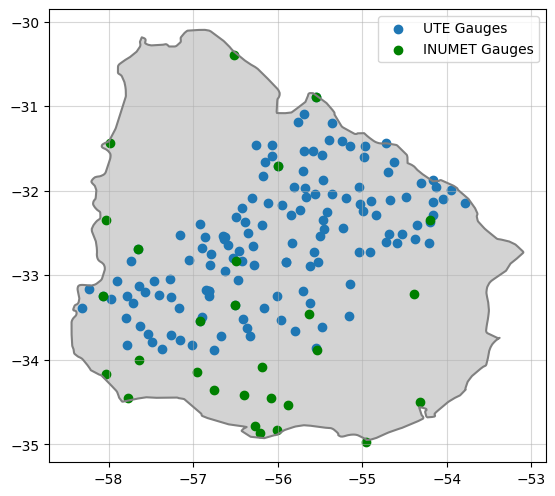

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig.set_dpi( 100 )

get_geometry_uruguay().plot(color="lightgrey",ax=ax)
get_geometry_uruguay().boundary.plot(ax=ax, color="grey")

# ute
geometry=[Point(xy) for xy in zip(df_lat_lon_ute["lon"], df_lat_lon_ute["lat"])]
geodata=gpd.GeoDataFrame(df_lat_lon_ute,  geometry=geometry)
geodata.plot(ax=ax, color="C0", label="UTE Gauges")  

# inumet
geometry=[Point(xy) for xy in zip(df_lat_lon_inumet["lon"], df_lat_lon_inumet["lat"])]
geodata=gpd.GeoDataFrame(df_lat_lon_inumet,  geometry=geometry)
geodata.plot(ax=ax, color="green", label="INUMET Gauges")  



ax.grid(b=True, alpha=0.5)
ax.legend()
plt.savefig('tesis_figure_1.png')
plt.show()



## Articulo 

### FIG_1 - Missing Rate Control


In [ ]:
missing_rate_control(df_ute_sbpp_raw, df_inumet_sbpp_raw)

### FIG_2 - Annual Avg Accumulative by Region

In [ ]:
dfs = []
gauges = ['precipitation', 'precipitation','precipitation']
titles = ['Region North', 'Region Center','Region South']

for _region in [__region_north, __region_center, __region_south]:
  ds_xr_acc_region_time = reporting_by_region_avg_time(_region)
  ds_xr_period = ds_xr_acc_region_time.resample(time='1Y').sum(dim='time')  # sumo los valores para el periodo
  
  dfs.append(ds_xr_period.to_dataframe())


reporting_cc_rmse_rb_plot(dfs, titles, gauges, ymax=4000)


### Table_2 - Annual AVC ACC by Region - CC-RMSE-RB

In [ ]:
df_report = None
gauges = ['precipitation', 'precipitation','precipitation']
regions = ['North', 'Center','South']
pos = 0 

for _region in [__region_north, __region_center, __region_south]:
  ds_xr_acc_region_time = reporting_by_region_avg_time(_region, quiet=True)
  ds_xr_period = ds_xr_acc_region_time.resample(time='1Y').sum(dim='time')  # sumo los valores para el periodo
  
  df_cc_region    = reporting_cc(ds_xr_period, 'precipitation')
  df_rmse_region  = reporting_rmse(ds_xr_period, 'precipitation') 
  df_rb_region    = reporting_rb(ds_xr_period, 'precipitation')

  df_cc_region    = df_cc_region[:1][['chirps','imerg_late','imerg_final','persiann']]
  df_cc_region    = df_cc_region.rename(index={'precipitation': 'CC'})

  df_report_region = df_cc_region 
  df_report_region = df_report_region.append(df_rmse_region)
  df_report_region = df_report_region.append(df_rb_region)

  df_report_region = df_report_region.reset_index().rename(columns={'index':'metric'})
  df_report_region['region'] = regions[pos]; pos = pos + 1

  if df_report is None:
    df_report = df_report_region
  else:
    df_report = df_report.append(df_report_region)

df_report_pivot = df_report.pivot(index=['region'], columns=['metric'], values=['chirps','imerg_late','imerg_final','persiann'])
df_report_pivot = df_report_pivot.swaplevel(i=-2, j=-1, axis=1).sort_index(axis='columns')
df_report_pivot = df_report_pivot.rename(columns={'chirps':'CH', 'imerg_late':'IL', 'imerg_final':'IF', 'persiann':'PS'})
df_report_pivot = np.around(df_report_pivot,2) 
df_report_pivot


### FIG_3 - MAP Daily CC - RMSE

In [ ]:
df_ute_sbpp.shape, df_inumet_sbpp.shape

In [ ]:
# df_ute_sbpp_raw, df_inumet_sbpp_raw
df_u =  df_ute_sbpp.rename(columns={'ute': 'precipitation'})
df_u['gauge'] = 'ute'

df_i =  df_inumet_sbpp.rename(columns={'inumet': 'precipitation'})
df_i['gauge'] = 'inumet'

df_ = df_u.append(df_i)
df_ = df_.sort_index()

df_ = df_['2001-01-01':'2020-12-31']
 
df_.to_xarray()

# for lat_lon, g in df_.groupby(['lat','lon']):
#   ds_xr_estacion = g.to_xarray().resample(time='1Y').sum(dim='time')  # sumo los valores para el periodo

#   # CC
#   df_cc_region    = reporting_cc(ds_xr_period, 'precipitation')
  
#   df_ = df_cc_region[:1].reset_index()[['chirps','imerg_late','imerg_final','persiann']]
#   df_[['lat','lon']] = lat_lon
#   df_['metric'] = 'cc'

#   # RB
#   df_rb_region    = reporting_rb(ds_xr_period, 'precipitation')

#   df_ = df_rb_region[:1].reset_index()[['chirps','imerg_late','imerg_final','persiann']]
#   df_[['lat','lon']] = lat_lon
#   df_['metric'] = 'rb'

#   display(df_)
#   aaaa


# reporting By Period: Raw Gauge-Satellite

## Yearly

### CC - RMSE - RB

#### UTE

In [ ]:
reporting_cc_rmse_rb(ds_xr_ute_sbpp_time,gauge='ute', title='UTE Yearly', period='1Y')

#### INUMET

In [ ]:
reporting_cc_rmse_rb(ds_xr_inumet_sbpp_time,gauge='inumet',title='INUMET Yearly', period='1Y')

### FAR - POD

#### UTE

In [ ]:
x = reporting_far_pod(ds_xr_ute_sbpp_time, gauge='ute', period='1Y')  

#### INUMET

In [ ]:
x = reporting_far_pod(ds_xr_inumet_sbpp_time, gauge='inumet', period='1Y')  

## Seasonaly

### CC - RMSE - RB

#### UTE

In [ ]:
reporting_cc_rmse_rb(ds_xr_ute_sbpp_time,gauge='ute', title='UTE Seasonal [QS-JUN]', period='QS-JUN')

#### INUMET

In [ ]:
reporting_cc_rmse_rb(ds_xr_inumet_sbpp_time,gauge='inumet', period='QS-DEC')

### FAR - POD

#### UTE

In [ ]:
x = reporting_far_pod(ds_xr_ute_sbpp_time, gauge='ute', period='QS-DEC')  

#### INUMET

In [ ]:
x = reporting_far_pod(ds_xr_inumet_sbpp_time, gauge='inumet', period='QS-DEC')  

## Monthly

### CC - RMSE - RB

#### UTE

In [ ]:
reporting_cc_rmse_rb(ds_xr_ute_sbpp_time,gauge='ute', period='1M')

#### INUMET

In [ ]:
reporting_cc_rmse_rb(ds_xr_inumet_sbpp_time,gauge='inumet', period='1M')

### FAR - POD

#### UTE

In [ ]:
x = reporting_far_pod(ds_xr_ute_sbpp_time, gauge='ute', period='1M')  

#### INUMET

In [ ]:
x = reporting_far_pod(ds_xr_inumet_sbpp_time, gauge='inumet', period='1M')  

## Weekly

### CC - RMSE - RB

#### UTE

In [ ]:
reporting_cc_rmse_rb(ds_xr_ute_sbpp_time,gauge='ute', period='1W')

#### INUMET

In [ ]:
reporting_cc_rmse_rb(ds_xr_inumet_sbpp_time,gauge='inumet', period='1W')

### FAR - POD

#### UTE

In [ ]:
x = reporting_far_pod(ds_xr_ute_sbpp_time, gauge='ute', period='1W')  

#### INUMET

In [ ]:
x = reporting_far_pod(ds_xr_inumet_sbpp_time, gauge='inumet', period='1W')  

## Daily

### CC - RMSE - RB

#### UTE

In [ ]:
reporting_cc_rmse_rb(ds_xr_ute_sbpp_time,gauge='ute', period='1D')

#### INUMET

In [ ]:
reporting_cc_rmse_rb(ds_xr_inumet_sbpp_time,gauge='inumet', period='1D')

### FAR - POD

#### UTE

In [ ]:
x = reporting_far_pod(ds_xr_ute_sbpp_time, gauge='ute', period='1D')  

#### INUMET

In [ ]:
x = reporting_far_pod(ds_xr_inumet_sbpp_time, gauge='inumet', period='1D')  

# Evaluar Regiones - Anual

## north

In [ ]:
ds_xr_mean_region_north_time = reporting_by_region_avg_time(__region_north)
# ds_xr_acc_region_north_time, nro_estaciones = reporting_by_region_acc_time(__region_north)
  

### CC RMSE RB

In [ ]:
reporting_cc_rmse_rb(ds_xr_mean_region_north_time,gauge='precipitation', title='north', period='1Y')

### FAR POD

In [ ]:
north_far_pod = reporting_far_pod(ds_xr_mean_region_north_time, gauge='precipitation', period='1Y')

## center

In [ ]:
ds_xr_mean_region_center_time = reporting_by_region_avg_time(__region_center)
# ds_xr_acc_region_center_time, nro_estaciones = reporting_by_region_acc_time(__region_center)

### CC RMSE RB

In [ ]:
reporting_cc_rmse_rb(ds_xr_mean_region_center_time,gauge='precipitation',title="center", period='1Y')

### FAR POD

In [ ]:
center_far_pod = reporting_far_pod(ds_xr_mean_region_center_time, gauge='precipitation', period='1Y')  

## south

In [ ]:
ds_xr_mean_region_south_time = reporting_by_region_avg_time(__region_south)
# ds_xr_acc_region_south_time, nro_estaciones = reporting_by_region_acc_time(__region_south)

### CC RMSE RB

In [ ]:
reporting_cc_rmse_rb(ds_xr_mean_region_south_time,gauge='precipitation', title='south', period='1Y')

### FAR POD

In [ ]:
south_far_pod = reporting_far_pod(ds_xr_mean_region_south_time, gauge='precipitation', period='1Y')  

## [FIG_2] Yearly

In [ ]:
dfs = []
gauges = ['precipitation', 'precipitation','precipitation']
titles = ['north', 'center','south']

for _region in [__region_north, __region_center, __region_south]:
  ds_xr_acc_region_time = reporting_by_region_avg_time(_region)
  ds_xr_period = ds_xr_acc_region_time.resample(time='1Y').sum(dim='time')  # sumo los valores para el periodo
  
  dfs.append(ds_xr_period.to_dataframe())


reporting_cc_rmse_rb_plot(dfs, titles, gauges, ymax=4000)


## [FIG_2] Seasonaly

In [ ]:
dfs = []
gauges = ['precipitation', 'precipitation','precipitation']
titles = ['north', 'center','south']

for _region in [__region_north, __region_center, __region_south]:
  ds_xr_acc_region_time = reporting_by_region_avg_time(_region)
  ds_xr_period = ds_xr_acc_region_time.resample(time='QS-DEC').sum(dim='time')  # sumo los valores para el periodo
  
  dfs.append(ds_xr_period.to_dataframe())


reporting_cc_rmse_rb_plot(dfs, titles, gauges, ymax=1700)


## [FIG_2] Weekly

In [ ]:
dfs = []
gauges = ['precipitation', 'precipitation','precipitation']
titles = ['north', 'center','south']

for _region in [__region_north, __region_center, __region_south]:
  ds_xr_acc_region_time = reporting_by_region_avg_time(_region)
  ds_xr_period = ds_xr_acc_region_time.resample(time='1W').sum(dim='time')  # sumo los valores para el periodo
  
  dfs.append(ds_xr_period.to_dataframe())


reporting_cc_rmse_rb_plot(dfs, titles, gauges)


# borrar

In [ ]:
ds_xr_ute_sbpp_time.mean()

In [ ]:
#  ute () float32 467.2 
#  chirps () float32 516.1 
#  imerg_late () float32 703.0 
#  imerg_final () float32 530.9 
#  persiann () float32 522.1



In [ ]:
mask = ds_xr_ute_sbpp_time['ute'] < 10
ds_xr_ute_sbpp_time['ute'].where(mask).to_dataframe()